In [37]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Populating the interactive namespace from numpy and matplotlib


In [38]:
names1880 = pd.read_csv('/Users/caiyilun/Desktop/mini #4/names/yob1880.txt',names=['name','sex','births'])

In [39]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [40]:
years = range(1880,2019)
pieces = []
columns = ['name','sex','births']
for year in years:
    path = '/Users/caiyilun/Desktop/mini #4/names/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index = True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [41]:
total_births = names.pivot_table('births',index = 'year',columns = 'sex', aggfunc = sum)
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110785
1887,145981,101412
1888,178622,120851


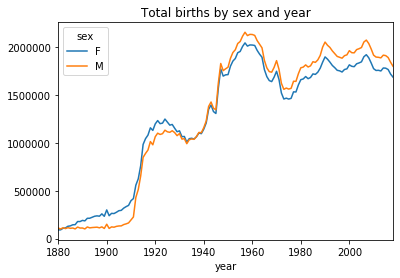

In [43]:
total_births.plot(title = 'Total births by sex and year')

In [44]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015539
8,Bertha,F,1320,1880,0.014506
9,Sarah,F,1288,1880,0.014155


In [47]:
def get_top1000(group):
    return group.sort_values(by = 'births',ascending = False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace = True, drop = True)

In [48]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births',index = 'year', columns = 'name', aggfunc = sum)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x132b1ecc0>,
      dtype=object)

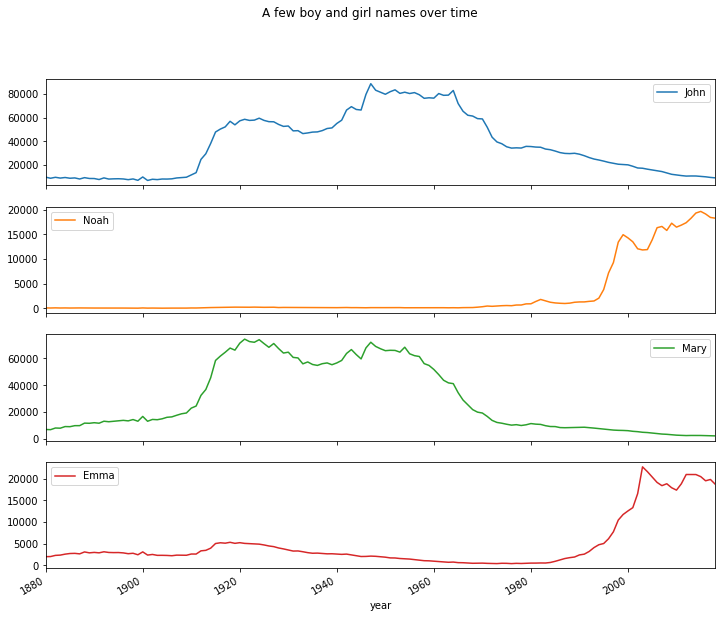

In [54]:
subset = total_births[['John','Noah','Mary','Emma']]
subset.plot(subplots = True, figsize = (12,10), grid = False, 
            title = 'A few boy and girl names over time')